# ECG-ViEW 

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

#Visualization Libraries
import seaborn as sns

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))
# Size of matplotlib histogram bins
bin_size = 40

## 1. ECG data processing

In [2]:
df_one = pd.read_csv('Electrocardiogram.csv')
df_one.head()

,personid,ecgdate,ecgdept,ecgsource,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI
0,120971,2006-05-23 09:57:00,H,M,952.0,NaN,NaN,388,397,NaN,NaN,NaN,9
1,120971,2012-04-19 08:09:06,H,E,750.0,140.0,84.0,360,415,NaN,NaN,NaN,9
2,270,2004-07-03 09:05:13,O,M,600.0,122.0,78.0,318,410,62.0,86.0,61.0,7
3,306709,2013-04-06 22:10:16,E,M,577.0,150.0,92.0,362,476,17.0,46.0,70.0,12
4,87768,1997-12-17 11:11:26,O,M,698.0,136.0,88.0,354,423,28.0,59.0,29.0,3


In [3]:
df_one.shape

(979273, 13)

In [4]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979273 entries, 0 to 979272
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   personid     979273 non-null  int64  
 1   ecgdate      979273 non-null  object 
 2   ecgdept      979273 non-null  object 
 3   ecgsource    979273 non-null  object 
 4   RR           979239 non-null  float64
 5   PR           774260 non-null  float64
 6   QRS          810373 non-null  float64
 7   QT           979273 non-null  int64  
 8   QTc          979273 non-null  int64  
 9   P_wave_axis  732827 non-null  float64
 10  QRS_axis     762274 non-null  float64
 11  T_wave_axis  762248 non-null  float64
 12  ACCI         979273 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 97.1+ MB


In [5]:
df_one.describe()

,personid,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI
count,979273.000000,979239.000000,774260.000000,810373.000000,979273.000000,979273.000000,732827.000000,762274.000000,762248.000000,979273.000000
mean,231021.688946,851.683240,157.081364,91.061474,389.997336,425.415081,48.357848,45.215670,46.198097,7.580933
std,133238.981417,196.989159,26.661289,15.149489,43.490019,31.493654,24.848064,38.048566,38.416339,3.062956
min,1.000000,204.000000,36.000000,2.000000,70.000000,53.000000,-89.000000,-89.000000,-89.000000,0.000000
25%,115711.000000,732.000000,140.000000,82.000000,364.000000,405.000000,36.000000,22.000000,28.000000,6.000000
50%,231037.000000,857.000000,156.000000,88.000000,390.000000,420.000000,52.000000,51.000000,44.000000,8.000000
75%,346411.000000,968.000000,172.000000,98.000000,416.000000,440.000000,65.000000,71.000000,59.000000,10.000000
max,461795.000000,30000.000000,1738.000000,380.000000,852.000000,878.000000,270.000000,270.000000,270.000000,23.000000


In [6]:
df_one = df_one.sort_values('ecgdate').drop_duplicates('personid',keep='last')
df_one.shape

(461034, 13)

In [7]:
df_one.dtypes

personid         int64
ecgdate         object
ecgdept         object
ecgsource       object
RR             float64
PR             float64
QRS            float64
QT               int64
QTc              int64
P_wave_axis    float64
QRS_axis       float64
T_wave_axis    float64
ACCI             int64
dtype: object

Text(0.5, 1.0, 'T wave axis')

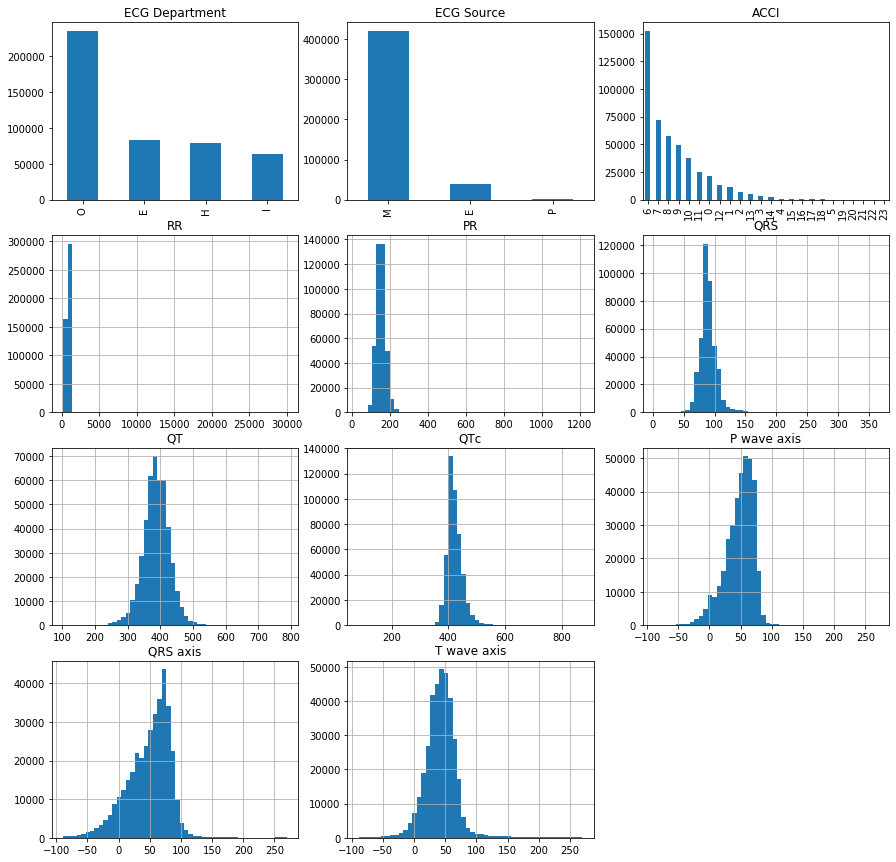

In [8]:
fig = plt.figure(figsize = (15,15))
fig_dim = (4,3)

plt.subplot2grid(fig_dim, (0,0))
df_one['ecgdept'].value_counts().plot(kind='bar', title='ECG Department')

plt.subplot2grid(fig_dim, (0,1))
df_one['ecgsource'].value_counts().plot(kind='bar', title='ECG Source')

plt.subplot2grid(fig_dim, (0,2))
df_one['ACCI'].value_counts().plot(kind='bar', title='ACCI')

plt.subplot2grid(fig_dim, (1,0))
df_one['RR'].hist(bins=50)
plt.title('RR')

plt.subplot2grid(fig_dim, (1,1))
df_one['PR'].hist(bins=50)
plt.title('PR')

plt.subplot2grid(fig_dim, (1,2))
df_one['QRS'].hist(bins=50)
plt.title('QRS')

plt.subplot2grid(fig_dim, (2,0))
df_one['QT'].hist(bins=50)
plt.title('QT')

plt.subplot2grid(fig_dim, (2,1))
df_one['QTc'].hist(bins=50)
plt.title('QTc')

plt.subplot2grid(fig_dim, (2,2))
df_one['P_wave_axis'].hist(bins=50)
plt.title('P wave axis')

plt.subplot2grid(fig_dim, (3,0))
df_one['QRS_axis'].hist(bins=50)
plt.title('QRS axis')

plt.subplot2grid(fig_dim, (3,1))
df_one['T_wave_axis'].hist(bins=50)
plt.title('T wave axis')

In [9]:
df_one.isnull().sum()

personid            0
ecgdate             0
ecgdept             0
ecgsource           0
RR                 23
PR              63805
QRS             54727
QT                  0
QTc                 0
P_wave_axis    100027
QRS_axis        92518
T_wave_axis     92521
ACCI                0
dtype: int64

In [10]:
# Drop instances that have missing values 
df_two = df_one.dropna(subset=['RR', 'PR', 'QRS', 'P_wave_axis','QRS_axis', 'T_wave_axis']);

In [11]:
df_two.isnull().sum()

personid       0
ecgdate        0
ecgdept        0
ecgsource      0
RR             0
PR             0
QRS            0
QT             0
QTc            0
P_wave_axis    0
QRS_axis       0
T_wave_axis    0
ACCI           0
dtype: int64

In [12]:
df_two.shape

(359497, 13)

In [13]:
# Drop unrelevant information 
df_three = df_two.drop(columns = ['ecgdate', 'ecgsource', 'ecgdept'])

In [14]:
df_three.head()

,personid,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI
970189,62646,594.0,134.0,88.0,326,422,42.0,-57.0,52.0,2
936960,225177,625.0,138.0,84.0,362,457,70.0,26.0,63.0,1
757784,100620,674.0,152.0,96.0,412,501,57.0,64.0,41.0,0
785324,391047,1053.0,184.0,88.0,388,377,67.0,73.0,48.0,0
877940,458019,909.0,132.0,92.0,400,419,29.0,63.0,53.0,0


## 2. Diagnosis code & personal info (sex)

In [15]:
df_diag_one = pd.read_csv('Diagnosis.csv', encoding='latin-1')
df_diag_one.head()

,personid,diagdate,diagcode,diaglocalcode,diagdept
0,141778,1997-06-04 00:00:00,L73.8,DC12467,O
1,141778,1997-06-07 00:00:00,L73.8,DC12467,O
2,141778,1997-06-16 00:00:00,L73.8,DC12467,O
3,141778,1997-06-23 00:00:00,L73.8,DC12467,O
4,141778,1997-06-30 00:00:00,L73.8,DC12467,O


In [16]:
df_diag_one.shape

(7743772, 5)

In [17]:
# Drop duplicate entries (repeated entry of the same ID)
df_diag_two = df_diag_one.sort_values('diagdate').drop_duplicates('personid',keep='last')
df_diag_two.sort_values(by=['personid'])

,personid,diagdate,diagcode,diaglocalcode,diagdept
1399097,1,1999-06-23 00:00:00,J30.4,DC3049,O
5955683,2,2010-09-09 00:00:00,G50.0,DC2017,O
1443173,3,1998-09-08 00:00:00,I20.9,DC5551,O
2970763,4,2005-10-21 00:00:00,M19.99A,DC5189,O
7033176,5,2012-02-08 00:00:00,R42,DC3614,O
...,...,...,...,...,...
4780076,461791,2007-09-27 15:20:00,D25.9,DC724,I
4198479,461792,2007-05-14 00:00:00,C16.9,DC3877,O
3048364,461793,2005-06-01 00:00:00,C73,DC4775,O
563760,461794,2002-07-04 00:00:00,M99623,DC2152,O


In [18]:
df_diag_two.shape

(424363, 5)

In [19]:
df_person = pd.read_csv('Person.csv')
df_person.head()

,personid,sex,Birthyeargroup,ethnicity
0,369485,1,16,1
1,138392,0,14,1
2,188469,1,20,1
3,169164,0,12,1
4,434516,1,14,1


In [20]:
df_person.shape

(461034, 4)

In [21]:
# Merge the diagnosis dataset with the personal info dataset with the common column (personid)
df_diag_person = pd.merge(df_diag_two, df_person, on='personid')

In [22]:
df_diag_person.head()

,personid,diagdate,diagcode,diaglocalcode,diagdept,sex,Birthyeargroup,ethnicity
0,68536,1994-08-30 02:37:00,K01.1,DC9189,I,1,16,1
1,216182,1995-01-03 23:45:00,G91.9,DC78,I,1,4,1
2,458392,1995-01-04 16:27:00,S72.20,DC13004,I,1,10,1
3,396139,1995-01-06 15:19:00,M19.99,DC7130,I,0,7,1
4,251126,1995-01-12 17:33:00,M95303,DC13765,I,0,11,1


In [23]:
df_diag_person.shape

(424363, 8)

In [24]:
df_diag_person.isnull().sum()

personid          0
diagdate          0
diagcode          0
diaglocalcode     0
diagdept          0
sex               0
Birthyeargroup    0
ethnicity         0
dtype: int64

In [25]:
####################### Create a new feature base on the diagnosis code: MI (1 = MI, 0 = no)
condition = (df_diag_person['diaglocalcode']=='DC5624')|(df_diag_person['diaglocalcode']=='DC7547')|(df_diag_person['diaglocalcode']=='DC8877')|(df_diag_person['diaglocalcode']=='DC910')|(df_diag_person['diaglocalcode']=='DC967')|(df_diag_person['diaglocalcode']=='DC13972')|(df_diag_person['diaglocalcode']=='DC14546')

df_diag_person['MI'] = np.where(condition, '1', '0')
df_diag_person.head()

,personid,diagdate,diagcode,diaglocalcode,diagdept,sex,Birthyeargroup,ethnicity,MI
0,68536,1994-08-30 02:37:00,K01.1,DC9189,I,1,16,1,0
1,216182,1995-01-03 23:45:00,G91.9,DC78,I,1,4,1,0
2,458392,1995-01-04 16:27:00,S72.20,DC13004,I,1,10,1,0
3,396139,1995-01-06 15:19:00,M19.99,DC7130,I,0,7,1,0
4,251126,1995-01-12 17:33:00,M95303,DC13765,I,0,11,1,0


In [26]:
# Check the number of entries of a specific diagnostic code 
df_diag_person['diaglocalcode'][df_diag_person['diaglocalcode'] == "DC14546"].value_counts()

DC14546    2
Name: diaglocalcode, dtype: int64

In [27]:
df_diag_person['diaglocalcode'].value_counts()

DC6671     26151
DC7933     12467
DC8645      8242
DC1255      6840
DC4775      5519
           ...  
DC4783         1
DC6980         1
DC13497        1
DC12126        1
DC3161         1
Name: diaglocalcode, Length: 10213, dtype: int64

In [28]:
df_diag_person['MI'].value_counts()

0    422474
1      1889
Name: MI, dtype: int64

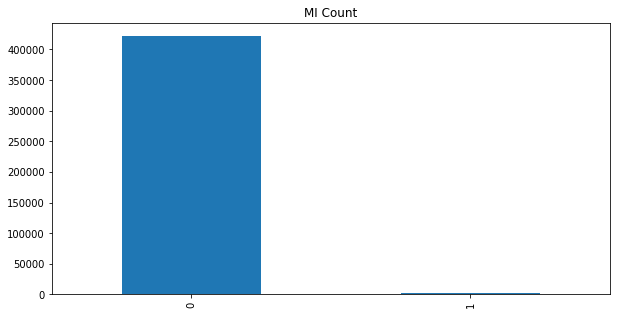

In [29]:
df_diag_person['MI'].value_counts().plot(kind='bar', title='MI Count')

In [30]:
df_diag_person.head()

,personid,diagdate,diagcode,diaglocalcode,diagdept,sex,Birthyeargroup,ethnicity,MI
0,68536,1994-08-30 02:37:00,K01.1,DC9189,I,1,16,1,0
1,216182,1995-01-03 23:45:00,G91.9,DC78,I,1,4,1,0
2,458392,1995-01-04 16:27:00,S72.20,DC13004,I,1,10,1,0
3,396139,1995-01-06 15:19:00,M19.99,DC7130,I,0,7,1,0
4,251126,1995-01-12 17:33:00,M95303,DC13765,I,0,11,1,0


## 3. Merge to obtain the final dataset 

In [31]:
# Merge the ecg dataset with the combined diagnosis/personal info dataset with the common column (personid)
df_1 = pd.merge(df_three, df_diag_person, on='personid')
df_1

,personid,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI,diagdate,diagcode,diaglocalcode,diagdept,sex,Birthyeargroup,ethnicity,MI
0,304289,1111.0,126.0,92.0,436,413,72.0,67.0,40.0,1,2006-06-22 00:00:00,I10,DC1255,O,0,11,1,0
1,178604,896.0,138.0,86.0,380,401,28.0,20.0,46.0,3,1995-02-02 15:42:00,H16.0,DC3913,I,1,8,1,0
2,94846,706.0,122.0,72.0,338,402,49.0,78.0,36.0,0,1995-02-02 16:50:00,H26.4,DC10607,I,0,18,1,0
3,118894,870.0,136.0,92.0,378,405,75.0,78.0,73.0,2,1995-02-08 17:18:00,H66.9,DC6976,I,1,10,1,0
4,38370,723.0,198.0,106.0,346,406,79.0,79.0,46.0,0,1995-02-06 14:45:00,J34.2,DC5890,I,1,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348285,1291,1034.0,180.0,94.0,440,431,75.0,89.0,45.0,7,2013-08-02 00:00:00,K30,DC2174,O,0,15,1,0
348286,289318,606.0,120.0,78.0,348,446,47.0,58.0,61.0,6,2013-08-01 00:14:00,T45.2,DC5852,I,1,22,1,0
348287,124810,667.0,150.0,96.0,384,469,26.0,-13.0,15.0,10,2013-08-05 00:00:00,D69.38,DC9023,O,1,14,1,0
348288,346968,789.0,172.0,160.0,450,506,89.0,68.0,15.0,9,2013-08-01 16:38:00,K92.2,DC2301,I,1,11,1,0


In [32]:
df_2 = df_1.drop(columns = ['diagdate', 'diagcode', 'diaglocalcode','diagdept', 'personid', 'ethnicity'])
df_2.head()

,RR,PR,QRS,QT,QTc,P_wave_axis,QRS_axis,T_wave_axis,ACCI,sex,Birthyeargroup,MI
0,1111.0,126.0,92.0,436,413,72.0,67.0,40.0,1,0,11,0
1,896.0,138.0,86.0,380,401,28.0,20.0,46.0,3,1,8,0
2,706.0,122.0,72.0,338,402,49.0,78.0,36.0,0,0,18,0
3,870.0,136.0,92.0,378,405,75.0,78.0,73.0,2,1,10,0
4,723.0,198.0,106.0,346,406,79.0,79.0,46.0,0,1,14,0


In [33]:
df_2['Birthyeargroup'].value_counts()

14    35795
15    32713
13    32066
16    28989
12    24051
10    23612
11    22553
9     22336
17    21913
18    17971
8     15008
20    13934
19    12859
21    12637
22     9303
7      8438
23     5886
6      4293
24     2043
5      1416
4       382
3        78
2         8
1         5
0         1
Name: Birthyeargroup, dtype: int64

In [34]:
df_2.shape

(348290, 12)

In [35]:
df_2['MI'].value_counts()

0    346665
1      1625
Name: MI, dtype: int64

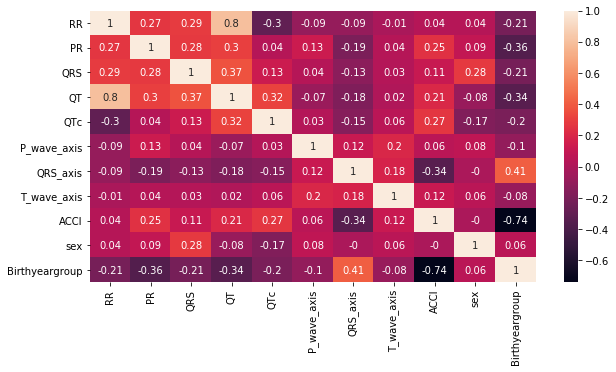

In [36]:
# Created a correlation matrix
correlation_matrix = df_2.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## 4. Split train and test data

In [68]:
train_data = df_2.values
train_data.shape

(348290, 12)

In [71]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Training data features
train_features = train_data[:, 0:11]

# 'MI' column values
train_target = train_data[:, 11]

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0,
                                                    shuffle=True)

print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(348290, 11) (348290,)
(278632, 11) (278632,)
(69658, 11) (69658,)


In [39]:
unique, counts = np.unique(train_y, return_counts=True)
dict(zip(unique, counts))

{'0': 277321, '1': 1311}

In [40]:
unique, counts = np.unique(test_y, return_counts=True)
dict(zip(unique, counts))

{'0': 69344, '1': 314}

## 5. Convolutional Neural Network 

In [41]:
# importing libraries
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from keras import regularizers
from keras.utils import to_categorical
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn import preprocessing
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from collections import Counter
import random

Using TensorFlow backend.


In [80]:
# preprocessing data 
train_data_normalized=preprocessing.normalize(train_data)

# Training data features
train_features_normalized = train_data_normalized[:, 0:11]

# 'MI' column values
train_target_normalized = train_data[:, 11]


In [81]:
# minority oversampling using SMOTE
over = SMOTE(sampling_strategy=0.1) # get 10% of the data from minority
under = RandomUnderSampler(sampling_strategy=0.5) # make majority only 50% more than the minorirt in final dataset
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_re_normalized, y_re_normalized = pipeline.fit_resample(train_features_normalized, train_target_normalized)


In [82]:
# split 80-20 train vs test data after resampling
cnn_train_x, cnn_test_x, cnn_train_y, cnn_test_y = train_test_split(x_re_normalized, 
                                                    y_re_normalized, 
                                                    test_size=0.20, 
                                                    random_state=0,
                                                    shuffle=True)

In [83]:
# getting data into correct format for tensorflow backend

# exporting data as a csv, combining x and y into one csv file
df_cnn_train_x=pd.DataFrame(data=cnn_train_x)
df_cnn_train_x.to_csv('trainx.csv', index=False)
df_cnn_train_y=pd.DataFrame(data=cnn_train_y)
df_cnn_train_y.to_csv('trainy.csv', index=False)
df_cnn_test_x=pd.DataFrame(data=cnn_test_x)
df_cnn_test_x.to_csv('testx.csv', index=False)
df_cnn_test_y=pd.DataFrame(data=cnn_test_y)
df_cnn_test_y.to_csv('testy.csv', index=False)

In [84]:
# getting data into correct format for tensorflow backend
df_cnn_train = pd.read_csv("train.csv", header=None)
df_cnn_train = df_cnn_train.sample(frac=1)
df_cnn_test = pd.read_csv("test.csv", header=None)

y_cnn = np.array(df_cnn_train[11].values).astype(np.int8)
y_cnn=to_categorical(y_cnn)
x_cnn = np.array(df_cnn_train[list(range(11))].values)[..., np.newaxis]
y_cnn_test = np.array(df_cnn_test[11].values).astype(np.int8)
x_cnn_test = np.array(df_cnn_test[list(range(11))].values)[..., np.newaxis]

In [85]:
def get_model():
    # number of categories in our problem
    nclass = 2
    # shape of input
    inp = Input(shape=(11, 1))
    
    # 1 -- 16 filters
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Dropout(rate=0.1)(img_1) #to prevent overfitting

    # 2 -- 32 filters
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Dropout(rate=0.1)(img_1) #to prevent overfitting
    
    # 3 -- 64 filters
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Dropout(rate=0.1)(img_1) #to prevent overfitting
    
    # 2 -- 256 filters # NEW
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.1)(img_1) #to prevent overfitting
    
    # 4 -- Dense layers
    dense_1 = Dense(64, activation=activations.relu, name="dense_1", kernel_regularizer=regularizers.l2(l=0.1))(img_1)
    dense_1 = Dense(16, activation=activations.relu, name="dense_2", kernel_regularizer=regularizers.l2(l=0.1))(dense_1)
    dense_1 = Dense(nclass, activation=activations.softmax, name="dense_3_ecg_view")(dense_1)
    
    
    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [86]:
model = get_model()
file_path = "baseline_cnn_ecgview.h5"

# checkpointing the model's weight based on the accuracy of the model
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# set early stopping based on accuracy improving or not. It stops after 5 epochs of no accuracy improvement
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)

# reduces learning rate when a metric has stopped improving
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)

# defining the callbacks list to include the above parameters
callbacks_list = [checkpoint, early, redonplat]

# train the model
model.fit(x_cnn, y_cnn, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model.load_weights(file_path)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 11, 1)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 7, 16)             96        
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 16)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 5, 32)             1568      
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 32)             0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 3, 64)             6208      
_________________________________________________________________
dropout_11 (Dropout)         (None, 3, 64)             0   

 - 11s - loss: 0.3648 - acc: 0.8250 - val_loss: 0.3518 - val_acc: 0.8268

Epoch 00038: val_acc did not improve from 0.82825
Epoch 39/1000
 - 10s - loss: 0.3648 - acc: 0.8251 - val_loss: 0.3516 - val_acc: 0.8266

Epoch 00039: val_acc did not improve from 0.82825
Epoch 00039: early stopping
Test f1 score : 0.8072497688041211 
Test ROC AUC Score : 0.806057114724021 


In [88]:
# test the model
pred_test = model.predict(x_cnn_test)
pred_test = np.argmax(pred_test, axis=-1)

# get f1 score of the model & print it. The f1 score considers the precision & recall.
f1 = f1_score(y_cnn_test, pred_test, average="macro")
print("Test f1 score : %s "% f1)

# get ROC AUC score of the model & print it
roc = roc_auc_score(y_cnn_test, pred_test)
print("Test ROC AUC Score : %s "% roc)

# get the accuracy and print it
acc = accuracy_score(y_cnn_test, pred_test)
print("Test accuracy score : %s "% acc)

Test f1 score : 0.8072497688041211 
Test ROC AUC Score : 0.806057114724021 
Test accuracy score : 0.8290865384615385 
